# Analysis OCM --> Ajah

Context: GivingTuesday frequently looks at government and non-profit data to uncover insights and
drive decision-making. We would like you to take a look at some data and deliver a report describing
your initial data exploration and **ideas for future work**. This report should:
● Summarize the data,
● Describe some interesting patterns and/or trends in the data,
● **Outline what a future research/business project might look like and why you think it's important**.

Expectation: Spend 2-3 hours ingesting data and analyzing. Use Python or SQL in analysis.

Objective: **Test technical skills, but also (more importantly) research/business problem-solving**.

Dataset:
● IRS Tax Extract and EOBMF
● US nonprofits are tax-exempt organizations, who must publicly report their taxes. The datasets
above summarize tax returns (tax extract) and organizations (EOBMF).

Description:
● Your job is to choose one or both files, and:
○ Quickly characterize the “grain” (what are rows unique to)
○ Quickly characterize the broad categories of data available (not by data type, but at the
semantic / analysis level)
○ Define an interesting business or research problem to solve
○ Quickly characterize the dataset (via summary stats or graphs), to generally characterize
the data you’ll be using for analysis.
○ Provide tabular and graphical breakdowns (at least one of each) of the data, along with
written commentary, to begin addressing that problem.

Expected outputs:
● Notebook containing code (Python or SQL), as well as tabular, graphical, and text outputs.
● Text outputs should:
○ Describe the dataset used (which file(s), grain & categories of data)
○ Describe the problem and why you think it’s important
○ Describe each analysis output - what it is and how it informs the business problem

Criteria we’ll be reviewing
● Overall coding and notebook approach
● Justification of what problem you choose
● Analytic approach to solving the problem
● Ability to communicate, in words, your findings
● Overall sense of quality, prioritization, approach, and technical skill

Desirable skills:
● Translating business problems into analyses
● Writing up and communicating results to technical and non-technical audiences
● Building notebooks or dashboards to make analysis repeatable (as needed)

## Libraries & WD

### Libraries

In [9]:
# Data manipulation
# ==============================================================================

import os 
import pandas as pd
import numpy as np
import openpyxl
import operator
from joblib import dump
from joblib import dump


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_curve, auc, confusion_matrix

# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

### Set Working directory

In [10]:
# Set the working directory

workspace_directory = "/Users/oskyroski/DataScience/Jobs"
os.chdir(workspace_directory)

### Ingest data files

In [11]:
# Leer el archivo Excel (.xlsx)
tax = pd.read_excel('22eoextract990.xlsx')

# Leer el archivo CSV
organizations = pd.read_csv('sit-2022.csv')

/var/folders/12/hygw2v555q7gknf575sn1wn00000gn/T/ipykernel_2772/3359184535.py:5: DtypeWarning: Columns (168,191,192,249,269) have mixed types. Specify dtype option on import or set low_memory=False.
  organizations = pd.read_csv('sit-2022.csv')


## Summarize the data

### Data Structure 

In [12]:
# dimensions of the dataframes
print("Dimensions of the tax dataframe:", tax.shape)
print("Dimensions of the organizations dataframe:", organizations.shape)

# Lcolumns of the dataframes
print("\nColumns of the tax dataframe:", tax.columns.tolist())
print("Columns of the CSV dataframe:", organizations.columns.tolist())

# first records of each dataframe
print("\nFirst records of the Excel dataframe:")
print(tax.head())

print("\nFirst records of the CSV dataframe:")
print(organizations.head())

# last records of each dataframe
print("\nLast records of the Excel dataframe:")
print(tax.tail())

print("\nLast records of the CSV dataframe:")
print(organizations.tail())

Dimensions of the tax dataframe: (326123, 246)
Dimensions of the organizations dataframe: (98802, 315)

Columns of the tax dataframe: ['efile', 'EIN', 'tax_pd', 'subseccd', 's501c3or4947a1cd', 'schdbind', 'politicalactvtscd', 'lbbyingactvtscd', 'subjto6033cd', 'dnradvisedfundscd', 'prptyintrcvdcd', 'maintwrkofartcd', 'crcounselingqstncd', 'hldassetsintermpermcd', 'rptlndbldgeqptcd', 'rptinvstothsecd', 'rptinvstprgrelcd', 'rptothasstcd', 'rptothliabcd', 'sepcnsldtfinstmtcd', 'sepindaudfinstmtcd', 'inclinfinstmtcd', 'operateschools170cd', 'frgnofficecd', 'frgnrevexpnscd', 'frgngrntscd', 'frgnaggragrntscd', 'rptprofndrsngfeescd', 'rptincfnndrsngcd', 'rptincgamingcd', 'operatehosptlcd', 'hospaudfinstmtcd', 'rptgrntstogovtcd', 'rptgrntstoindvcd', 'rptyestocompnstncd', 'txexmptbndcd', 'invstproceedscd', 'maintescrwaccntcd', 'actonbehalfcd', 'engageexcessbnftcd', 'awarexcessbnftcd', 'loantofficercd', 'grantoofficercd', 'dirbusnreltdcd', 'fmlybusnreltdcd', 'servasofficercd', 'recvnoncashcd', '

### EDA 

Descriptive statistics for specified variables:
        totreprtabled  totcomprelatede   totestcompf  noindiv100kcnt  \
count   3.261190e+05     3.261190e+05  3.261190e+05   326119.000000   
mean    2.004203e+05     1.413442e+05  4.069280e+04        7.502396   
std     1.085399e+06     1.084708e+06  2.500990e+05      501.017898   
min    -8.518700e+04    -7.000000e+00 -6.211200e+04        0.000000   
25%     0.000000e+00     0.000000e+00  0.000000e+00        0.000000   
50%     0.000000e+00     0.000000e+00  0.000000e+00        0.000000   
75%     9.599950e+04     0.000000e+00  3.806500e+03        0.000000   
max     1.157163e+08     8.906100e+07  4.380467e+07   138734.000000   

       nocontractor100kcnt  
count        326119.000000  
mean              4.842401  
std            1025.395076  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max          514728.000000  


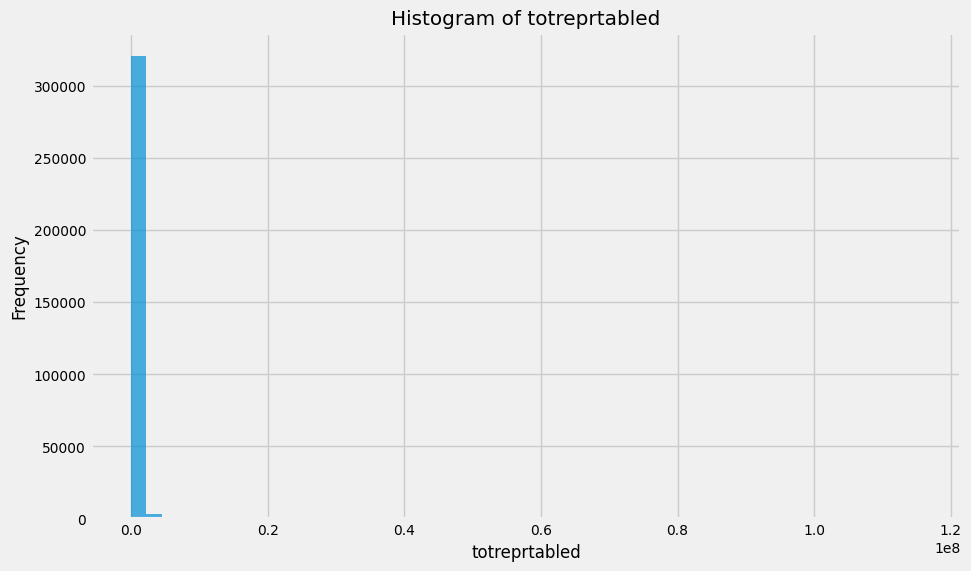

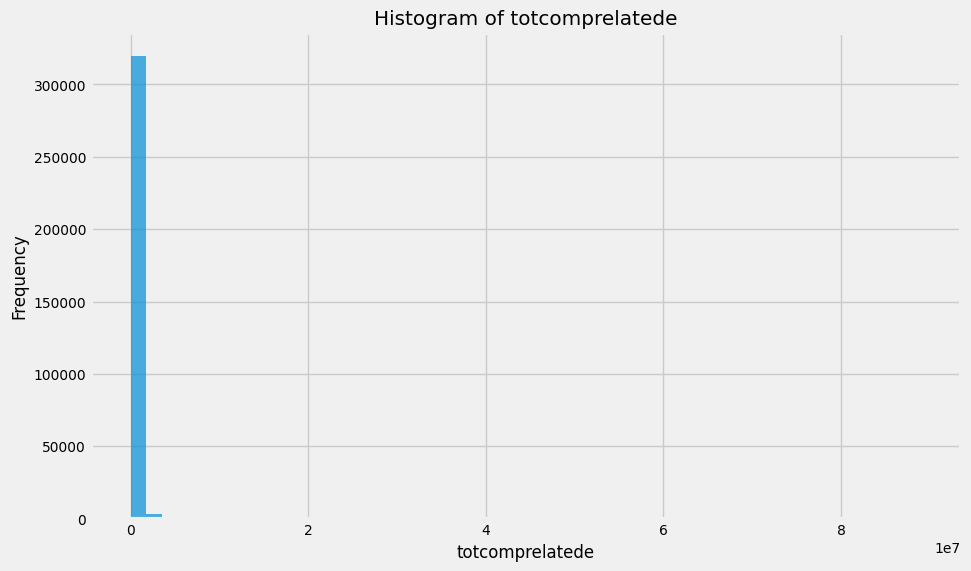

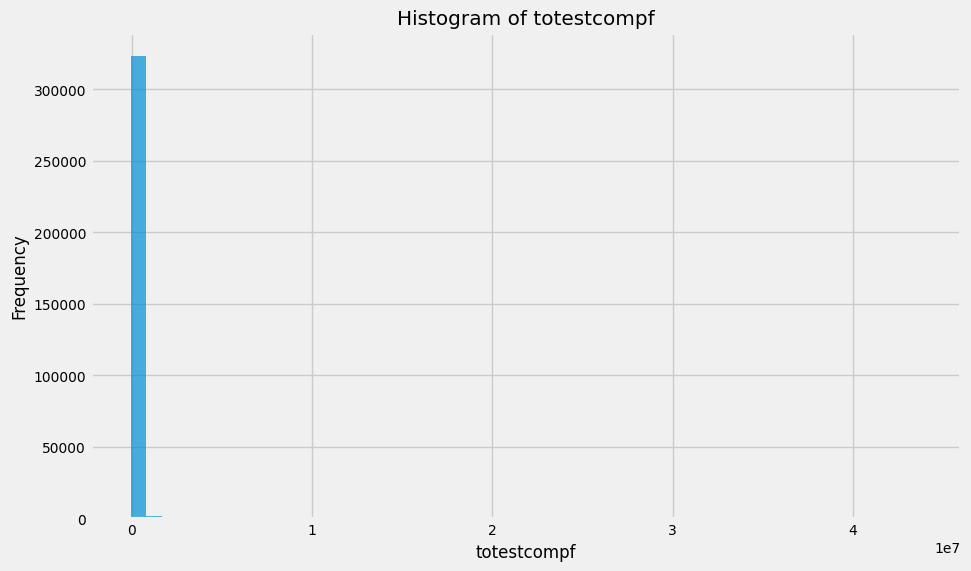

In [24]:
# Specified variables for analysis
variables = [
    'totreprtabled', 'totcomprelatede', 'totestcompf', 'noindiv100kcnt', 
    'nocontractor100kcnt'
]

# Calculate descriptive statistics for these variables
descriptive_stats = tax[variables].describe()
print("Descriptive statistics for specified variables:\n", descriptive_stats)

# Plotting histograms for each of the specified variables
# Due to space and readability, plotting a few as an example
plot_variables = ['totreprtabled', 'totcomprelatede', 'totestcompf']  # Example subset of variables for plotting

for variable in plot_variables:
    plt.figure(figsize=(10, 6))
    # Drop missing values for plotting
    valid_data = tax[variable].dropna()
    plt.hist(valid_data, bins=50, alpha=0.7)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Before continue, we must applied a transformation or deal with outliers 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


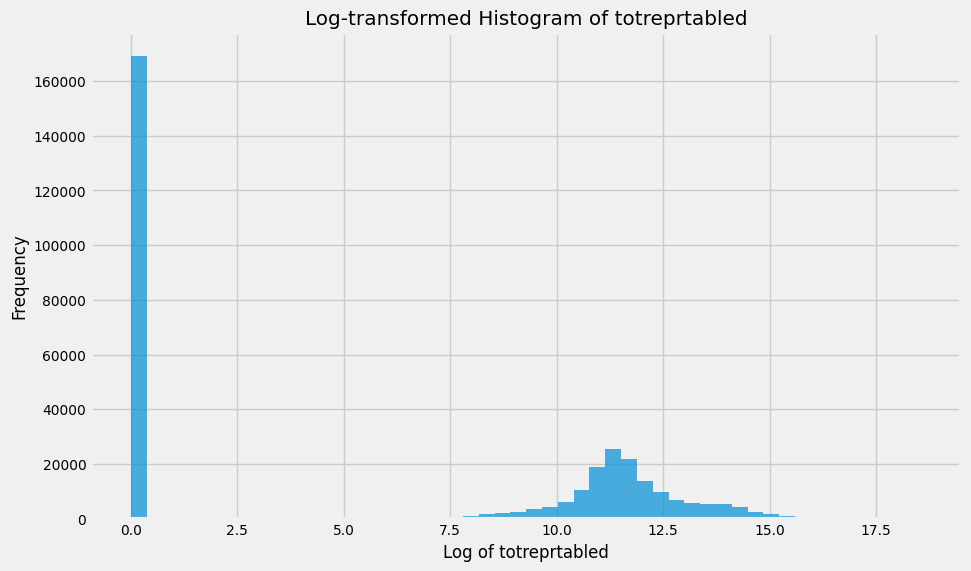

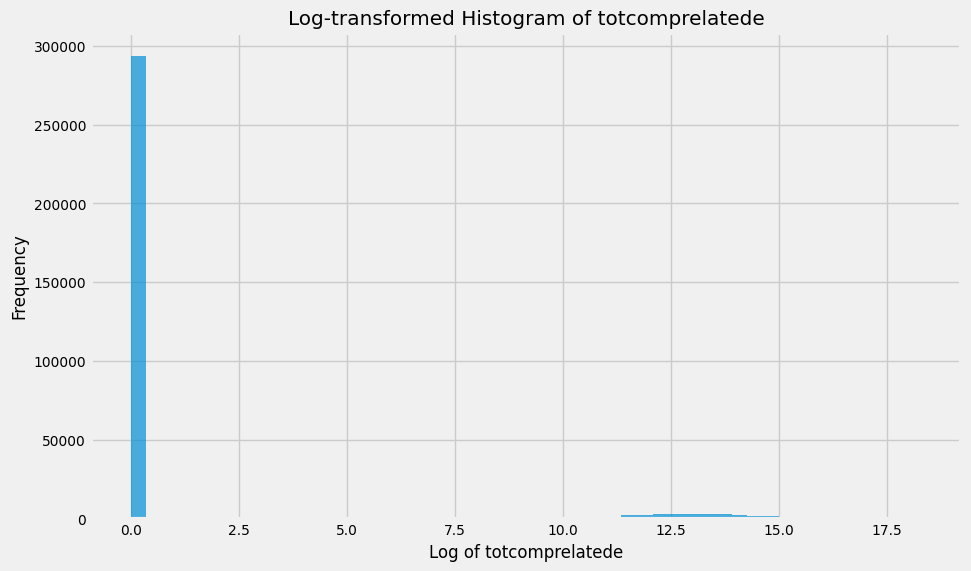

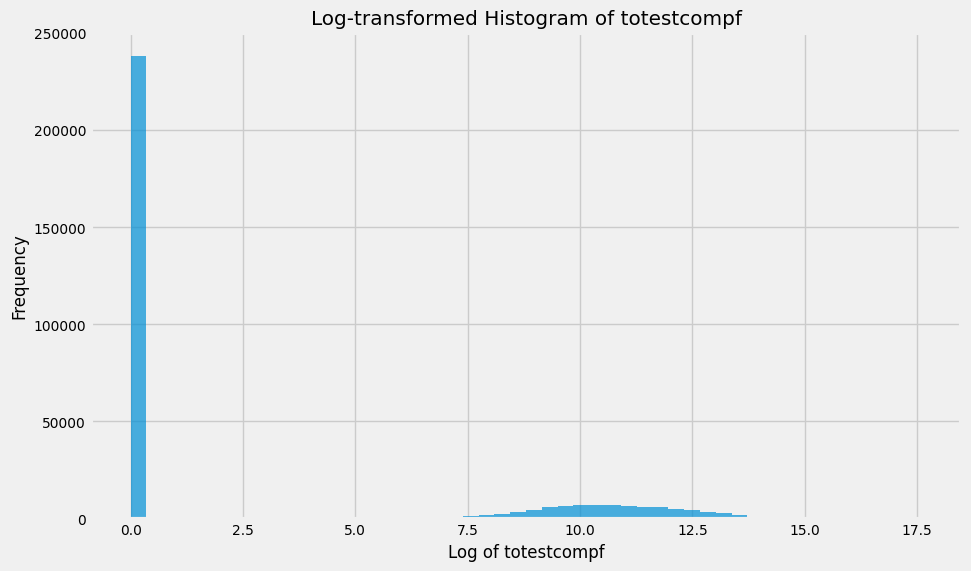

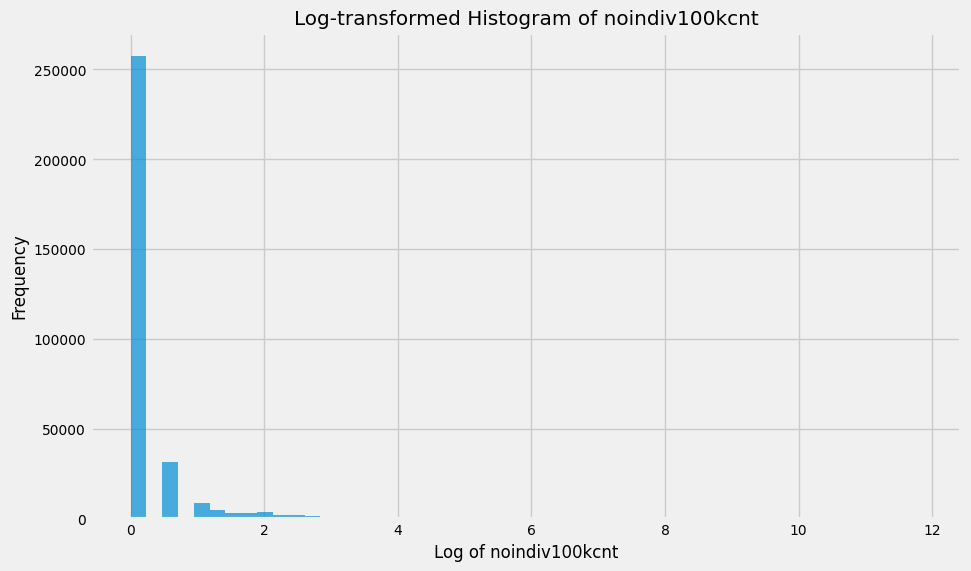

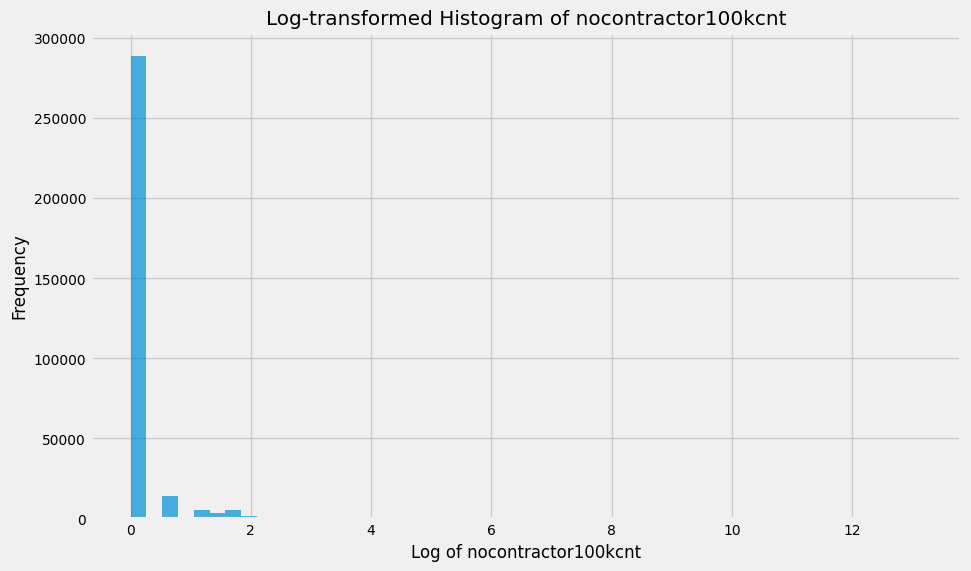

In [25]:
df_log_transformed = tax[variables].apply(lambda x: np.log(x + 1))
# Plotting histograms for the log-transformed variables
for variable in variables:
    plt.figure(figsize=(10, 6))
    # We can skip dropna as we added 1 before taking log, assuming negative values don't exist in the data
    plt.hist(df_log_transformed[variable], bins=50, alpha=0.7)
    plt.title(f'Log-transformed Histogram of {variable}')
    plt.xlabel(f'Log of {variable}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Describe some interesting patterns and/or trends in the data

In the analysis of the tax data, we observed a significant prevalence of extreme values, as well as instances where the amounts are very small, close to zero. Properly addressing these issues is crucial for an accurate interpretation of the data.

Firstly, dealing with the extreme values involves discerning whether these are outliers that represent genuine phenomena or if they are anomalies due to systematic errors. Outliers can have a disproportionate effect on average values and variances, potentially leading to misleading conclusions. They warrant a thorough investigation to determine if they should be included in the analysis or if some form of data transformation, such as winsorization or logarithmic scaling, is necessary to mitigate their impact.

Secondly, for those values that are near zero, it's important to consider the context. If these values indicate non-reporting or a lack of activity, it might be appropriate to exclude them from certain analyses. On the other hand, they could represent a legitimate part of the distribution that should be understood in its own right. In such cases, creating a hierarchy of tax brackets could greatly enhance our comprehension of the tax data landscape, allowing us to see not just the distribution of values but how they relate to different levels of tax activity.

Finally, the richness of this tax data affords the opportunity to delve into a myriad of analyses. This could include examining trends over time, conducting subgroup analyses, or exploring correlations with other variables. Each of these avenues could reveal unique insights into the behaviors and patterns inherent in the tax data, providing valuable information for decision-making and policy development.

## **Outline what a future research/business project might look like and why you think it's important**

**Outlier Analysis and Data Integrity Project**
Understanding the anomalies within tax data is crucial for maintaining the integrity of financial analyses. A future project could focus on developing robust algorithms to detect outliers automatically, distinguishing between data entry errors and legitimate but unusual financial reports. This is important because it not only ensures accurate reporting for regulatory purposes but also helps in identifying potential cases of fraud or financial mismanagement. Ensuring data accuracy aids non-profits in maintaining public trust and government entities in safeguarding public funds.

**Trend Analysis in Charitable Contributions**
A study to analyze the trends in charitable giving over time can be highly beneficial. By leveraging tax data, we can identify patterns in donor behavior, peak giving seasons, and shifts in donor focus to different sectors of need. This is important for non-profit organizations in strategizing their fundraising campaigns and for policymakers to understand the impact of tax incentives on charitable giving, enabling them to design policies that encourage generosity and support for vital causes.

**Tax Burden and Economic Impact Study**
Researching the tax burden on various socioeconomic groups can provide insights into the equity and efficiency of the tax system. A project that examines how different tax policies affect income distribution and economic growth can inform tax reform debates and guide the creation of more equitable tax laws. This kind of analysis is significant for fostering an economic environment where both individuals and businesses can thrive.

**Digitalization and Automation in Tax Reporting**
Investigating the potential for digitalizing and automating the tax reporting process could be transformative. This project would look into the adoption of advanced technologies like AI and blockchain to streamline tax filing, reduce errors, and increase transparency. This is particularly important as it can lead to significant time and cost savings for tax authorities and filers alike, as well as enhanced compliance and reduced opportunity for evasion.

**Predictive Analytics for Tax Revenue Forecasting**
A project aimed at developing predictive models for tax revenue could have a substantial impact on budget planning and economic forecasting. By analyzing past tax data and identifying the key predictors of revenue fluctuations, governments and financial analysts could make more informed decisions about future spending, investment, and savings needs. The importance of this project lies in its ability to help stabilize financial markets and government services during economic uncertainties.

## Session information

In [14]:
import session_info
session_info.show(html=False)

-----
joblib              1.3.2
matplotlib          3.8.3
numpy               1.26.1
openpyxl            3.1.2
pandas              2.1.1
seaborn             0.13.2
session_info        1.0.0
sklearn             1.4.1.post1
-----
IPython             8.16.1
jupyter_client      8.5.0
jupyter_core        5.4.0
-----
Python 3.11.6 (v3.11.6:8b6ee5ba3b, Oct  2 2023, 11:18:21) [Clang 13.0.0 (clang-1300.0.29.30)]
macOS-13.5.2-x86_64-i386-64bit
-----
Session information updated at 2024-04-02 11:13
